In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import collections

In [2]:
complaint_data = pd.read_csv('NYPD_Complaint_Data_Historic.csv', dtype=object)
population_data = pd.read_csv('Population_by_Borough_NYC.csv')
crime_data = pd.read_csv('Crime_Column_Description.csv')

In [3]:
from collections import defaultdict

months_by_count = {i+1: 0 for i in range(12)}
days_by_count = {i+1: 0 for i in range(31)}
years_by_count = defaultdict(int)
day_of_year = {}

for i in complaint_data['CMPLNT_FR_DT']:
    if ( isinstance(i ,str) ):
        dates = i.split('/')
        months_by_count[int(dates[0])] += 1
        days_by_count[int(dates[1])] += 1
        years_by_count[int(dates[2])] += 1
        
        day_of_year[dates[0] + '/' + dates[1] ] = day_of_year.get(dates[0] + '/' + dates[1] ,0) + 1

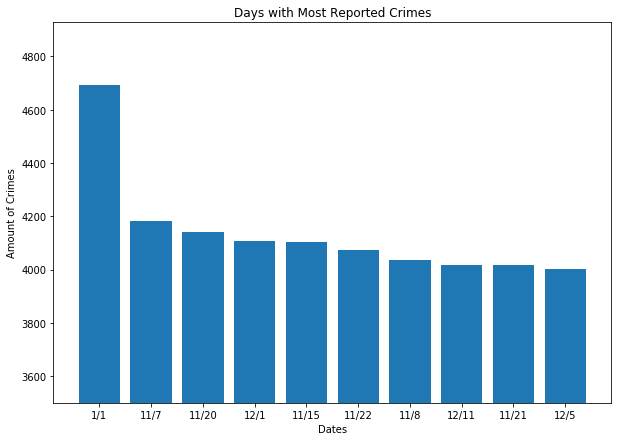

In [4]:
plt.figure(figsize=[10,7])

day_of_year = dict(collections.Counter(day_of_year).most_common(10))
plt.bar(day_of_year.keys(), day_of_year.values())
plt.gca().set_ylim(ymin=3500)
plt.ylabel('Amount of Crimes')
plt.xlabel('Dates')
plt.title('Days with Most Reported Crimes')
plt.show()

In [5]:
complaint_data = complaint_data.drop(["KY_CD", "PD_CD", "RPT_DT", "PARKS_NM", "HADEVELOPT", "Lat_Lon", "PREM_TYP_DESC", "LOC_OF_OCCUR_DESC", "PD_DESC", "OFNS_DESC", "CMPLNT_TO_TM", "CMPLNT_TO_DT", "CMPLNT_NUM", "X_COORD_CD", "Y_COORD_CD", "JURIS_DESC", "CRM_ATPT_CPTD_CD"], axis = 1)


In [6]:
complaint_data = complaint_data.dropna()

In [7]:
complaint_data.head(5)

,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,BORO_NM,ADDR_PCT_CD,Latitude,Longitude
0,12/31/2015,23:45:00,FELONY,BRONX,44,40.82884833,-73.91666114
1,12/31/2015,23:36:00,FELONY,QUEENS,103,40.69733814,-73.78455674
2,12/31/2015,23:30:00,FELONY,MANHATTAN,28,40.80260661,-73.94505191
3,12/31/2015,23:30:00,MISDEMEANOR,QUEENS,105,40.65454944,-73.72633879
4,12/31/2015,23:25:00,MISDEMEANOR,MANHATTAN,13,40.7380024,-73.98789129


In [8]:
complaint_data['HOUR'] = complaint_data['CMPLNT_FR_TM'].apply(lambda x: x.split(':')[0])
complaint_data['MINUTE'] = complaint_data['CMPLNT_FR_TM'].apply(lambda x: x.split(':')[1])
complaint_data['MONTH'] = complaint_data['CMPLNT_FR_DT'].apply(lambda x: x.split('/')[0])
complaint_data['DAY'] = complaint_data['CMPLNT_FR_DT'].apply(lambda x: x.split('/')[1])
complaint_data['YEAR'] = complaint_data['CMPLNT_FR_DT'].apply(lambda x: x.split('/')[2])
complaint_data = complaint_data.drop(["CMPLNT_FR_DT", "CMPLNT_FR_TM"], axis=1)
complaint_data.head(5)

,LAW_CAT_CD,BORO_NM,ADDR_PCT_CD,Latitude,Longitude,HOUR,MINUTE,MONTH,DAY,YEAR
0,FELONY,BRONX,44,40.82884833,-73.91666114,23,45,12,31,2015
1,FELONY,QUEENS,103,40.69733814,-73.78455674,23,36,12,31,2015
2,FELONY,MANHATTAN,28,40.80260661,-73.94505191,23,30,12,31,2015
3,MISDEMEANOR,QUEENS,105,40.65454944,-73.72633879,23,30,12,31,2015
4,MISDEMEANOR,MANHATTAN,13,40.7380024,-73.98789129,23,25,12,31,2015


In [9]:
complaint_data["ACTUAL"] = pd.factorize(complaint_data['LAW_CAT_CD'])[0]
complaint_data = complaint_data.drop(['LAW_CAT_CD'], axis=1)


In [10]:
one_hot2 = pd.get_dummies(complaint_data['BORO_NM'])
complaint_data = complaint_data.drop('BORO_NM',axis = 1)
complaint_data = complaint_data.join(one_hot2)
complaint_data.head(5)

,ADDR_PCT_CD,Latitude,Longitude,HOUR,MINUTE,MONTH,DAY,YEAR,ACTUAL,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
0,44,40.82884833,-73.91666114,23,45,12,31,2015,0,1,0,0,0,0
1,103,40.69733814,-73.78455674,23,36,12,31,2015,0,0,0,0,1,0
2,28,40.80260661,-73.94505191,23,30,12,31,2015,0,0,0,1,0,0
3,105,40.65454944,-73.72633879,23,30,12,31,2015,1,0,0,0,1,0
4,13,40.7380024,-73.98789129,23,25,12,31,2015,1,0,0,1,0,0


In [12]:
labels = np.array(complaint_data['ACTUAL'])
complaint_data = complaint_data.drop('ACTUAL', axis = 1)
feature_list = list(complaint_data.columns)
features = np.array(complaint_data)
rand = np.random.randint(0,features.shape[0], 400000)
features = features[rand]

In [13]:
labels = labels[rand]
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (300000, 13)
Training Labels Shape: (300000,)
Testing Features Shape: (100000, 13)
Testing Labels Shape: (100000,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=150)

#Train the model using the training sets
knn.fit(train_features, train_labels)

#Predict the response for test dataset
y_pred = knn.predict(test_features)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test_labels, y_pred))  
print(classification_report(test_labels, y_pred))  
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
errors = abs(y_pred - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

[[ 1177 30199     0]
 [ 1258 54268     0]
 [  342 12756     0]]
              precision    recall  f1-score   support

           0       0.42      0.04      0.07     31376
           1       0.56      0.98      0.71     55526
           2       0.00      0.00      0.00     13098

   micro avg       0.55      0.55      0.55    100000
   macro avg       0.33      0.34      0.26    100000
weighted avg       0.44      0.55      0.42    100000

Accuracy: 0.55445
Mean Absolute Error: 0.45 degrees.


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(estimator= knn,     # Model to test
                X= features,  
                y = labels,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(knn_scores)
print("Average accuracy: ", knn_scores.mean())

Accuracy per fold: 
[ 0.55408615  0.554525    0.553425    0.55395     0.55425     0.55525
  0.554475    0.554975    0.554375    0.55501388]
Average accuracy:  0.554432502319


In [18]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(max_depth=10)  
classifier.fit(train_features, train_labels)
y_pred = classifier.predict(test_features) 

In [19]:
print(confusion_matrix(test_labels, y_pred))  
print(classification_report(test_labels, y_pred))  
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
errors = abs(y_pred - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

[[ 1563 29778    35]
 [ 1462 54021    43]
 [  367 12699    32]]
              precision    recall  f1-score   support

           0       0.46      0.05      0.09     31376
           1       0.56      0.97      0.71     55526
           2       0.29      0.00      0.00     13098

   micro avg       0.56      0.56      0.56    100000
   macro avg       0.44      0.34      0.27    100000
weighted avg       0.49      0.56      0.42    100000

Accuracy: 0.55616
Mean Absolute Error: 0.45 degrees.


In [20]:
dt_scores = cross_val_score(estimator= classifier,     
                X= features,  
                y = labels,     
                scoring = "accuracy",               
                cv=10)                              

print("Accuracy per fold: ")
print(dt_scores)
print("Average accuracy: ", dt_scores.mean())

Accuracy per fold: 
[ 0.55656109  0.557275    0.556825    0.55555     0.5559      0.556525
  0.555825    0.55595     0.555475    0.55538888]
Average accuracy:  0.556127497069
